<a href="https://colab.research.google.com/github/kapilnchauhan77/Fashion_MNIST_GAN/blob/master/GAN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.activations import relu, tanh
from tensorflow.keras.layers import Dropout, Dense, Flatten, BatchNormalization, Conv2D, Activation, Conv2DTranspose, Input, Reshape

In [0]:
data_set = tf.keras.datasets.fashion_mnist
(x_train, _), (_, _) = data_set.load_data()

In [0]:
x_train = np.array(x_train).reshape(-1, 28, 28, 1)
x_test = np.array(x_test).reshape(-1, 28, 28, 1)

In [0]:
x_train = np.array(x_train).astype(np.float32)
x_test = np.array(x_test).astype(np.float32)

In [0]:
def Discriminator():

  model = Sequential()

  model.add(Flatten(input_shape=x_train.shape[1:]))
  model.add(Dense(512, activation="relu"))
  model.add(Dense(256, activation="relu"))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=x_train.shape[1:])
  validity = model(img)

  return Model(img, validity)
  

In [160]:
discriminator = Discriminator()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_48 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_49 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
_________________________________________________________________


In [0]:
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5), metrics=['accuracy'])

In [0]:
def Generator():

  model = Sequential()

  model.add(Dense(256, input_dim=100, activation="relu"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(512, activation="relu"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(1024, activation="relu"))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Dense(np.prod((28,28)), activation='tanh'))
  model.add(Reshape((28,28,1)))

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)
  

In [0]:
generator = Generator()

In [0]:
noise = Input(shape=(100,))
img = generator(noise)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(noise, validity)
combined.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.0002, 0.5))

In [0]:
x_train=x_train/255
x_test=x_test/255

In [0]:
def train_gan(epochs, batch_size):
  valid = np.ones((batch_size, 1))
  fake = np.zeros((batch_size, 1))
  for i in range(epochs):
    noise = np.random.normal(0, 1, (batch_size, 100))
    noise = noise.astype(np.float32)
    gen_imgs = generator.predict(noise)

    idx = np.random.randint(0, x_train.shape[0], batch_size)
    imgs = x_train[idx]

    d_loss_real = discriminator.train_on_batch(imgs, valid)
    d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    noise = np.random.normal(0, 1, (batch_size, 100))
    g_loss = combined.train_on_batch(noise, valid)

    print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (i+1, d_loss[0], 100*d_loss[1], g_loss))

In [175]:
train_gan(30000, 128)

1 [D loss: 0.125637, acc.: 96.09%] [G loss: 4.005607]
2 [D loss: 0.148446, acc.: 94.14%] [G loss: 4.291065]
3 [D loss: 0.132440, acc.: 95.31%] [G loss: 3.910400]
4 [D loss: 0.155153, acc.: 95.70%] [G loss: 3.434569]
5 [D loss: 0.125839, acc.: 96.09%] [G loss: 4.414526]
6 [D loss: 0.235296, acc.: 91.41%] [G loss: 4.515477]
7 [D loss: 0.091882, acc.: 96.48%] [G loss: 4.876094]
8 [D loss: 0.181353, acc.: 94.92%] [G loss: 3.967722]
9 [D loss: 0.119668, acc.: 96.88%] [G loss: 4.113984]
10 [D loss: 0.075356, acc.: 97.27%] [G loss: 4.483306]
11 [D loss: 0.122802, acc.: 96.48%] [G loss: 3.607035]
12 [D loss: 0.193955, acc.: 92.19%] [G loss: 4.077625]
13 [D loss: 0.211837, acc.: 92.58%] [G loss: 4.932131]
14 [D loss: 0.122236, acc.: 94.92%] [G loss: 4.924842]
15 [D loss: 0.091620, acc.: 98.05%] [G loss: 4.540881]
16 [D loss: 0.108817, acc.: 96.48%] [G loss: 4.792250]
17 [D loss: 0.220931, acc.: 92.19%] [G loss: 4.010340]
18 [D loss: 0.281845, acc.: 91.02%] [G loss: 4.304009]
19 [D loss: 0.13066

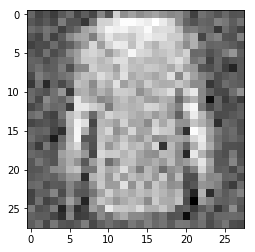

In [146]:
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")

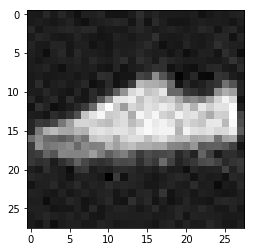

In [177]:
noise = np.random.normal(0, 1, (1, 100))
gen_imgs = generator.predict(noise)
plt.imshow(gen_imgs[0, :,:,0], cmap="gray")